# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = False)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_colwidth", None)

import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Loading Dataset
### Performing preprocessing by splitting into training, test, and validation sets

In [ ]:
# https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?select=Womens+Clothing+E-Commerce+Reviews.csv

dataset = 'drive/MyDrive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv'

df = pd.read_csv(dataset)
print(df.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [ ]:
len(df)

23486

In [ ]:
# df[df['Rating'] == 2][['Review Text', 'Rating']].head()
# pd.DataFrame(df[df['Rating'] == 3][['Rating', 'Review Text']]).head()

In [ ]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [ ]:
# Drop rows having nan values from 'Review Text' & 'Rating ' columns
df = df.dropna(axis=0, subset=['Review Text'])
df = df.dropna(axis=0, subset=['Rating'])

In [ ]:
df['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [ ]:
# Changing Rating values from a range of 1-5 to 0-4
df['Rating'] = df['Rating'] - 1

In [ ]:
df['Rating'].value_counts()

4    12540
3     4908
2     2823
1     1549
0      821
Name: Rating, dtype: int64

In [ ]:
# samples = 5000
# frac_val = len(df) // samples

# sampled_df_new = df.sample(frac = frac_val, random_state = 42)
# sampled_df_new['Rating'].value_counts()

In [ ]:
# Re-sampling the data points from the main dataset due to it having class imbalance
# New label counts will be present in sampling_strat

empty_df = pd.DataFrame(columns = ['Review Text', 'Rating'])
sampling_strat = {4: 900, 3: 800, 2: 700, 1: 600, 0: 500}
sampled_data = []

for i in range(5):
  sampled_data.append(pd.DataFrame(df[df['Rating'] == i][['Review Text', 'Rating']]).head(sampling_strat[i]))

sampled_df = pd.concat([empty_df, pd.concat(sampled_data)])
sampled_df['Rating'].value_counts()

4    900
3    800
2    700
1    600
0    500
Name: Rating, dtype: int64

In [ ]:
# sampled_df[sampled_df['Rating'] == 2].head(10)
# sampled_df.head(10)

In [ ]:
shuffled_df = sampled_df.sample(frac = 1, random_state = 42)
# shuffled_df.head(10)

In [ ]:
shuffled_df['Rating'].value_counts()

4    900
3    800
2    700
1    600
0    500
Name: Rating, dtype: int64

In [ ]:
# X = df.iloc[:,4].values
# y = df.iloc[:,5].values

X = shuffled_df.iloc[:,0].values
# y = shuffled_df.iloc[:,1].values
y = np.array(shuffled_df.iloc[:,1].values, dtype=np.int64)

print(X.dtype, y.dtype)

object int64


In [ ]:
# X = sampled_df_new.iloc[:,4].values
# y = sampled_df_new.iloc[:,5].values

# print(X.dtype, y.dtype)

In [ ]:
print(X.shape)
print(X)
# print(type(X))

(3500,)
['A cute top. the peplum seam hits me at the right spot on my waist. for my curvy figure, this isn\'t always the case. i also am drawn to tanks that i can actually wear a bra underneath without showing bra straps.\r\ni usually vary between a medium and a large in deletta, but definitely needed a large.\r\ni ordered the "lavender" color, which is disappointing; a dull gray. i\'ve decided to return and order the coral instead.'
 'This dress is absolutely beautiful! and, had it been just a little longer or a little shorter i would have kept it. but, the hem hit me at just the wrong spot! alas, i had to send it back :('
 'I tried this skirt in my usual size s, and although it fit, it was too short for my liking and made my hips look wide b/c of the way it billowed out. the size m looked much better- hit me right below the knee in the front. (i\'m 5\'2") my skirt is much more high-low than the picture. also, it sits much lower on my waist, which i like. i bought the blue, and with t

In [ ]:
print(y)

[2 3 3 ... 2 1 4]


In [ ]:
X_temp, X_validation, y_temp, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

(2100,) (2100,)
(700,) (700,)
(700,) (700,)


In [ ]:
training_df = pd.DataFrame({'Review Text' : X_train,
                            'Rating' : y_train})

validation_df = pd.DataFrame({'Review Text' : X_validation,
                            'Rating' : y_validation})

test_df = pd.DataFrame({'Review Text' : X_test,
                            'Rating' : y_test})

In [ ]:
training_df['Rating'].value_counts()

4    541
3    481
2    413
1    364
0    301
Name: Rating, dtype: int64

In [ ]:
validation_df['Rating'].value_counts()

4    192
3    147
2    140
1    120
0    101
Name: Rating, dtype: int64

In [ ]:
test_df['Rating'].value_counts()

3    172
4    167
2    147
1    116
0     98
Name: Rating, dtype: int64

# Trying out different types of classifiers

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

(2100,) (2100,)
(700,) (700,)
(700,) (700,)


In [ ]:
def return_stats(y_true, y_pred):
  classfier_accuracy = round(accuracy_score(y_true, y_pred), 3)
  precision = round(precision_score(y_true, y_pred, average = 'macro'), 3)
  recall = round(recall_score(y_true, y_pred, average = 'macro'), 3)
  f1 = round(f1_score(y_true, y_pred, average = 'macro'), 3)

  print(classfier_accuracy, precision, recall, f1)

  return([classfier_accuracy, precision, recall, f1])

In [ ]:
all_stats_train = []
all_stats_val = []
classification_report_list = []
classifier_stats_df = pd.DataFrame(columns = ['Classifier', 'Classifier Accuracy', 'Precision', 'Recall', 'F1'])

In [ ]:

dc_strat1 = DummyClassifier(strategy = 'most_frequent', random_state = 42)
dc_strat1.fit(X_train, y_train)

val_score = dc_strat1.score(X_validation, y_validation)
print(val_score)

y_validation_pred = dc_strat1.predict(X_validation)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
all_stats_val.append(stats)

class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
classification_report_list.append(class_rep)
print(class_rep)

y_train_pred = dc_strat1.predict(X_train)
stats = return_stats(y_train, y_train_pred)
all_stats_train.append(stats)


# val_score = dc_strat1.score(X_train, y_train)
# print(val_score)

# y_train_pred = dc_strat1.predict(X_train)
# cm = confusion_matrix(y_train, y_train_pred)
# print(cm)

# stats = return_stats(y_train, y_train_pred)
# all_stats.append(stats)


# print(X.dtype, type(X))
# print(y.dtype, type(y))
# print(X_validation.dtype, type(X_validation))
# print(y_validation.dtype, type(y_validation))
# # print(y_validation_pred.dtype, type(y_validation_pred))
# print(X_train.dtype, type(X_train))
# print(y_train.dtype, type(y_train))

0.2742857142857143
[[  0   0   0   0 101]
 [  0   0   0   0 120]
 [  0   0   0   0 140]
 [  0   0   0   0 147]
 [  0   0   0   0 192]]
0.274 0.055 0.2 0.086
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       147
           4       0.27      1.00      0.43       192

    accuracy                           0.27       700
   macro avg       0.05      0.20      0.09       700
weighted avg       0.08      0.27      0.12       700

0.258 0.052 0.2 0.082


In [ ]:

dc_strat2 = DummyClassifier(strategy = 'stratified', random_state = 42)
dc_strat2.fit(X_train, y_train)

val_score = dc_strat2.score(X_validation, y_validation)
print(val_score)

y_validation_pred = dc_strat2.predict(X_validation)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
all_stats_val.append(stats)

class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
classification_report_list.append(class_rep)
print(class_rep)

y_train_pred = dc_strat2.predict(X_train)
stats = return_stats(y_train, y_train_pred)
all_stats_train.append(stats)

# val_score = dc_strat2.score(X_train, y_train)
# print(val_score)

# y_train_pred = dc_strat1.predict(X_train)
# cm = confusion_matrix(y_train, y_train_pred)
# print(cm)

# stats = return_stats(y_train, y_train_pred)
# all_stats.append(stats)

0.22285714285714286
[[13 18 23 28 19]
 [20 24 26 22 28]
 [28 24 23 34 31]
 [27 23 26 35 36]
 [24 27 38 42 61]]
0.223 0.212 0.21 0.21
              precision    recall  f1-score   support

           0       0.12      0.13      0.12       101
           1       0.21      0.20      0.20       120
           2       0.17      0.16      0.17       140
           3       0.22      0.24      0.23       147
           4       0.35      0.32      0.33       192

    accuracy                           0.22       700
   macro avg       0.21      0.21      0.21       700
weighted avg       0.23      0.22      0.22       700

0.204 0.194 0.194 0.194


In [ ]:

X_train_validation = np.concatenate((X_train, X_validation))

vectorizer = CountVectorizer(binary = True)
vectorizer.fit(X_train_validation)
X_train_onehot = vectorizer.transform(X_train)
X_validation_onehot = vectorizer.transform(X_validation)

# X_train_onehot.toarray()

lr = LogisticRegression(random_state = 42, max_iter = 500)
lr.fit(X_train_onehot, y_train)

y_validation_pred = lr.predict(X_validation_onehot)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
all_stats_val.append(stats)

class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
classification_report_list.append(class_rep)
print(class_rep)

y_train_pred = lr.predict(X_train_onehot)
stats = return_stats(y_train, y_train_pred)
all_stats_train.append(stats)

[[ 40  37  11   6   7]
 [ 22  43  37  13   5]
 [ 13  33  55  30   9]
 [  6  13  26  66  36]
 [  2   5  12  45 128]]
0.474 0.461 0.453 0.456
              precision    recall  f1-score   support

           0       0.48      0.40      0.43       101
           1       0.33      0.36      0.34       120
           2       0.39      0.39      0.39       140
           3       0.41      0.45      0.43       147
           4       0.69      0.67      0.68       192

    accuracy                           0.47       700
   macro avg       0.46      0.45      0.46       700
weighted avg       0.48      0.47      0.48       700

0.997 0.998 0.997 0.997


In [ ]:

vectorizer = TfidfVectorizer()
print("Params of Vectorizer : \n", vectorizer.get_params())
vectorizer.fit(X_train_validation)

X_train_tfidf = vectorizer.transform(X_train)
X_validation_tfidf = vectorizer.transform(X_validation)

lr = LogisticRegression(random_state = 42, max_iter = 500)
lr.fit(X_train_tfidf, y_train)

print(lr.score(X_train_tfidf, y_train))

y_validation_pred = lr.predict(X_validation_tfidf)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
all_stats_val.append(stats)

class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
classification_report_list.append(class_rep)
print(class_rep)

y_train_pred = lr.predict(X_train_tfidf)
stats = return_stats(y_train, y_train_pred)
all_stats_train.append(stats)

print(lr.get_params())

Params of Vectorizer : 
 {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}
0.8423809523809523
[[ 36  34  15  10   6]
 [ 16  39  42  15   8]
 [  7  29  59  33  12]
 [  3   7  17  71  49]
 [  1   1   8  33 149]]
0.506 0.49 0.472 0.475
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       101
           1       0.35      0.33      0.34       120
           2       0.42      0.42      0.42       140
           3       0.44      0.48      0.46       147
           4       0.67      0.78      0.72       192

    accuracy                           0.51 

In [ ]:
# Best Classifier
class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4], output_dict = True)
class_scores = [round(class_rep[str(i)]['f1-score'], 3) for i in range(5)]
class_scores

[0.439, 0.339, 0.42, 0.46, 0.716]

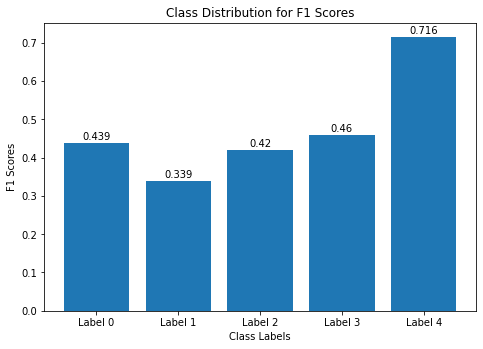

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

b = ax.bar([0, 1, 2, 3, 4], class_scores)
ax.set_xlabel('Class Labels')
ax.set_ylabel('F1 Scores')
ax.set_title('Class Distribution for F1 Scores')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Label ' + str(i) for i in range(5)])

for p in b:
  height = p.get_height()
  ax.text(x=p.get_x() + p.get_width() - 0.4, y=height + 0.008,
  s="{}".format(height),
  ha='center')

plt.show()

In [ ]:

svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(X_train_onehot, y_train)

y_validation_pred = svc.predict(X_validation_onehot)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
all_stats_val.append(stats)

class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
classification_report_list.append(class_rep)
print(class_rep)

y_train_pred = svc.predict(X_train_onehot)
stats = return_stats(y_train, y_train_pred)
all_stats_train.append(stats)

[[ 37  32  18   8   6]
 [ 12  30  54  17   7]
 [  6  23  63  36  12]
 [  6   6  21  70  44]
 [  2   6   4  50 130]]
0.471 0.466 0.444 0.448
              precision    recall  f1-score   support

           0       0.59      0.37      0.45       101
           1       0.31      0.25      0.28       120
           2       0.39      0.45      0.42       140
           3       0.39      0.48      0.43       147
           4       0.65      0.68      0.66       192

    accuracy                           0.47       700
   macro avg       0.47      0.44      0.45       700
weighted avg       0.48      0.47      0.47       700

0.925 0.928 0.924 0.925


In [ ]:
# Tabular form saving of classifier metrics

classifier_stats = []
for i in range(len(all_stats_val)):
  stats = all_stats_val[i]
  classifier_stats.append({'Classifier' : i+1,
                          'Classifier Accuracy' : stats[0],
                          'Precision' : stats[1],
                          'Recall' : stats[2],
                          'F1': stats[3]})

row_to_append = pd.DataFrame(classifier_stats)
classifier_stats_val_df = pd.concat([classifier_stats_df, row_to_append])

classifier_stats = []
for i in range(len(all_stats_train)):
  stats = all_stats_train[i]
  classifier_stats.append({'Classifier' : i+1,
                          'Classifier Accuracy' : stats[0],
                          'Precision' : stats[1],
                          'Recall' : stats[2],
                          'F1': stats[3]})

row_to_append = pd.DataFrame(classifier_stats)
classifier_stats_train_df = pd.concat([classifier_stats_df, row_to_append])
# Tabular form saving of classifier metrics

In [ ]:
print(classifier_stats_val_df)
print(classifier_stats_train_df)

  Classifier  Classifier Accuracy  Precision  Recall     F1
0          1                0.274      0.055   0.200  0.086
1          2                0.223      0.212   0.210  0.210
2          3                0.474      0.461   0.453  0.456
3          4                0.506      0.490   0.472  0.475
4          5                0.471      0.466   0.444  0.448
  Classifier  Classifier Accuracy  Precision  Recall     F1
0          1                0.258      0.052   0.200  0.082
1          2                0.204      0.194   0.194  0.194
2          3                0.997      0.998   0.997  0.997
3          4                0.842      0.849   0.836  0.841
4          5                0.925      0.928   0.924  0.925


In [ ]:
# classification_report_list[0]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Trying out Naive Baye's methods and other stuff


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
vectorizer = CountVectorizer(max_features = None, min_df=15, max_df=0.9)
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()

In [ ]:
# nb = CategoricalNB()
# nb = BernoulliNB()
# nb = GaussianNB()
nb = MultinomialNB()

nb.fit(X_train_vectorized, y_train)
return_stats(y_train, nb.predict(X_train_vectorized))

X_validation_vectorized = vectorizer.transform(X_validation).toarray()
y_validation_pred = nb.predict(X_validation_vectorized)

return_stats(y_validation, y_validation_pred)

0.679 0.672 0.674 0.671
0.48 0.461 0.456 0.458


[0.48, 0.461, 0.456, 0.458]

In [ ]:
print(confusion_matrix(y_validation, y_validation_pred))
print(classification_report(y_validation, y_validation_pred))

[[ 40  33  18   7   3]
 [ 25  40  39  15   1]
 [ 10  29  61  31   9]
 [  6  12  24  62  43]
 [  6   4   8  41 133]]
              precision    recall  f1-score   support

           0       0.46      0.40      0.43       101
           1       0.34      0.33      0.34       120
           2       0.41      0.44      0.42       140
           3       0.40      0.42      0.41       147
           4       0.70      0.69      0.70       192

    accuracy                           0.48       700
   macro avg       0.46      0.46      0.46       700
weighted avg       0.48      0.48      0.48       700



In [ ]:
clf = GradientBoostingClassifier(n_estimators=850, max_features = 'auto', random_state = 42)

clf.fit(X_train_vectorized, y_train)

X_validation_vectorized = vectorizer.transform(X_validation).toarray()
y_validation_pred = clf.predict(X_validation_vectorized)

In [ ]:
print(confusion_matrix(y_validation, y_validation_pred))
print(classification_report(y_validation, y_validation_pred))

[[ 34  38  11  13   5]
 [ 23  37  36  17   7]
 [  9  38  41  41  11]
 [  2  16  31  58  40]
 [  2   3  10  44 133]]
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       101
           1       0.28      0.31      0.29       120
           2       0.32      0.29      0.30       140
           3       0.34      0.39      0.36       147
           4       0.68      0.69      0.69       192

    accuracy                           0.43       700
   macro avg       0.42      0.41      0.41       700
weighted avg       0.44      0.43      0.43       700



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# clf = MLPClassifier(alpha = 1e-1, hidden_layer_sizes=(8, 15), random_state=42)
clf = MLPClassifier(random_state=42)

# clf.fit(X_train_vectorized, y_train)

# X_validation_vectorized = vectorizer.transform(X_validation).toarray()
# y_validation_pred = clf.predict(X_validation_vectorized)

param_grid = {'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 'solver' : ['adam', 'lbfgs', 'sgd'], 'activation' : ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate' : ['constant', 'invscaling', 'adaptive']}

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv=5)

grid_search.fit(X_train_vectorized, y_train)

# print("Solver is {}".format(lr.get_params()['solver']))
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)
print("Params : ", grid_search.get_params())

Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'learning_rate': 'constant', 'solver': 'lbfgs'}
Accuracy score:  0.4123809523809524
Params :  {'cv': 5, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 42, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=42), 'n_jobs': None, 'param_grid': {'alpha': [0

In [ ]:
clf = MLPClassifier(alpha = 0.1, activation = 'relu', learning_rate = 'constant', solver = 'lbfgs', random_state=42)

clf.fit(X_train_vectorized, y_train)

X_validation_vectorized = vectorizer.transform(X_validation).toarray()
y_validation_pred = clf.predict(X_validation_vectorized)

In [ ]:
print(confusion_matrix(y_validation, y_validation_pred))
print(classification_report(y_validation, y_validation_pred))

[[ 42  33  11   8   7]
 [ 26  37  36  15   6]
 [ 19  31  42  33  15]
 [  4  16  21  61  45]
 [  5   5  10  49 123]]
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       101
           1       0.30      0.31      0.31       120
           2       0.35      0.30      0.32       140
           3       0.37      0.41      0.39       147
           4       0.63      0.64      0.63       192

    accuracy                           0.44       700
   macro avg       0.42      0.42      0.42       700
weighted avg       0.43      0.44      0.43       700



# Tuning of Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.8, max_features = None)

print(vectorizer.get_params())

# temp - init on top - rempve later
X_train_validation = np.concatenate((X_train, X_validation))

vectorizer.fit(X_train_validation)
X_train_tfidf = vectorizer.transform(X_train)
X_validation_tfidf = vectorizer.transform(X_validation)

lr = LogisticRegression(random_state = 42, max_iter = 500)
print(lr.get_params())

param_grid = {'C': [0.01, 0.05, 0.1, 1, 3, 5, 8]}
# param_grid = {'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']}

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv=5)

grid_search.fit(X_train_tfidf, y_train)

print("Solver is {}".format(lr.get_params()['solver']))
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)
print("Params : ", grid_search.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.8, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': True, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Solver is lbfgs
Best parameters:  {'C': 2}
Accuracy score:  0.4557142857142857
Params :  {'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator_

In [ ]:
# once best params are received for all 3 cases, run fresh again and get final score
lr = LogisticRegression(C = 2, random_state = 42, max_iter = 500)
lr.fit(X_train_tfidf, y_train)
print(lr.get_params())

y_validation_pred = lr.predict(X_validation_tfidf)
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
print(class_rep)

{'C': 2, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[ 43  35  13   5   5]
 [ 18  42  40  16   4]
 [  9  31  57  33  10]
 [  2   7  23  73  42]
 [  1   4   8  35 144]]
0.513 0.5 0.486 0.49
              precision    recall  f1-score   support

           0       0.59      0.43      0.49       101
           1       0.35      0.35      0.35       120
           2       0.40      0.41      0.41       140
           3       0.45      0.50      0.47       147
           4       0.70      0.75      0.73       192

    accuracy                           0.51       700
   macro avg       0.50      0.49      0.49       700
weighted avg       0.51      0.51      0.51       700



# Using BERT for working with context vectors


In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset
from transformers import AutoTokenizer, RobertaTokenizer
from transformers import AutoModelForSequenceClassification, RobertaForSequenceClassification, RobertaModel
from torch import nn
import torch
from transformers import Trainer
from transformers import TrainingArguments
from sklearn.metrics import f1_score, accuracy_score
from transformers import set_seed

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base', num_labels = 5)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def encode_text(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_state = outputs[0]
    return last_hidden_state[:, 0, :]

X_train_list = []

for text in X_train:
    encoding = encode_text(text)
    X_train_list.append(encoding.tolist()[0])

    # print(len(encoding.tolist()[0]))
    # print(encoding.tolist())
    # X_train_list.append(encoding.numpy())

# X_train_list = np.array(X_train_list)

In [ ]:
# X_train_list

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_list, y_train)

LogisticRegression()

In [ ]:
X_validation_list = []

for text in X_validation:
    encoding = encode_text(text)
    X_validation_list.append(encoding.tolist()[0])

# X_validation_list = np.array(X_validation_list)

y_validation_pred = classifier.predict(X_validation_list)

cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

stats = return_stats(y_validation, y_validation_pred)
class_rep = classification_report(y_validation, y_validation_pred, labels=[0, 1, 2, 3, 4])
print(class_rep)

[[ 42  31  19   5   4]
 [ 21  43  41  11   4]
 [ 15  19  58  39   9]
 [  5   3  26  66  47]
 [  1   0   2  40 149]]
0.511 0.491 0.483 0.484
              precision    recall  f1-score   support

           0       0.50      0.42      0.45       101
           1       0.45      0.36      0.40       120
           2       0.40      0.41      0.41       140
           3       0.41      0.45      0.43       147
           4       0.70      0.78      0.74       192

    accuracy                           0.51       700
   macro avg       0.49      0.48      0.48       700
weighted avg       0.51      0.51      0.51       700



In [ ]:
# (b)

full_dataset = DatasetDict({ 'train':Dataset.from_dict({'text':X_train, 'label':y_train}),
                  'validation':Dataset.from_dict({'text':X_validation, 'label':y_validation})
     })

lenOfTrainingSet = len(full_dataset['train'])
print(lenOfTrainingSet)

full_dataset

2100


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2100
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 700
    })
})

In [ ]:
tokenizer_rb = RobertaTokenizer.from_pretrained('roberta-base')
model_rb = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
tokenizer_bbu = AutoTokenizer.from_pretrained('bert-base-uncased')
model_bbu = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# full_dataset['train']['text'][1]

In [ ]:
def tokenize_text_rb(data):
  return(tokenizer_rb(data['text'], padding = True, max_length = 512))

def tokenize_text_bbu(data):
  return(tokenizer_bbu(data['text'], padding = True, max_length = 512))

In [ ]:
full_dataset_tokenized_rb = full_dataset.map(tokenize_text_rb, batched = True)
full_dataset_tokenized_rb = full_dataset_tokenized_rb.rename_column('label', 'labels')
full_dataset_tokenized_rb

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 2100
    })
    validation: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 700
    })
})

In [ ]:
full_dataset_tokenized_bbu = full_dataset.map(tokenize_text_bbu, batched = True)
full_dataset_tokenized_bbu = full_dataset_tokenized_bbu.rename_column('label', 'labels')
full_dataset_tokenized_bbu

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2100
    })
    validation: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 700
    })
})

In [ ]:
class NewTrainer(Trainer):
  def compute_loss(self, model, inputs, return_outputs = False):
    outputs = model(**inputs)
    logits = outputs.get('logits')
    labels = inputs.get('labels')
    loss_func = nn.CrossEntropyLoss()
    loss = loss_func(logits, labels)
    return(loss, outputs) if return_outputs else loss

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = 'macro')
  c_accuracy = accuracy_score(labels, preds)
  return({'f1' : f1, 'c_accuracy' : c_accuracy})

In [ ]:
def set_training_args(lr, ep, wd, bs):
  learning_rate = lr
  epochs = ep
  weight_decay = wd
  batch_size = bs

  log_training_steps = lenOfTrainingSet // batch_size

  training_args = TrainingArguments(
      output_dir="PartB", # HuggingFace wants a name for your model
      evaluation_strategy="epoch", # How often we want to evaluate the model
      learning_rate=learning_rate, # Hyperparameter
      per_device_train_batch_size=batch_size, # Hyperparameter
      per_device_eval_batch_size=batch_size, # Hyperparameter
      num_train_epochs=epochs, # Hyperparameter
      weight_decay=weight_decay, # Hyperparameter
      logging_steps = log_training_steps
      # fp16 = True
  )

  return(training_args)

In [ ]:
# Param set #1

learning_rate = 1e-4
epochs = 3
weight_decay = 0
batch_size = 16

training_args = set_training_args(learning_rate, epochs, weight_decay, batch_size)

trainer = NewTrainer(model = model_rb,
                     args = training_args,
                     compute_metrics = compute_metrics,
                     train_dataset = full_dataset_tokenized_rb['train'],
                     eval_dataset = full_dataset_tokenized_rb['validation'],
                     tokenizer = tokenizer_rb)

trainer.train()

Epoch,Training Loss,Validation Loss,F1,C Accuracy
1,1.134300,1.141692,0.390137,0.477143
2,0.967800,1.109468,0.480031,0.524286
3,0.772400,1.152101,0.513196,0.534286


TrainOutput(global_step=396, training_loss=0.9552261612632058, metrics={'train_runtime': 187.7446, 'train_samples_per_second': 33.556, 'train_steps_per_second': 2.109, 'total_flos': 475925218234200.0, 'train_loss': 0.9552261612632058, 'epoch': 3.0})

In [ ]:
pred = trainer.predict(full_dataset_tokenized_rb['validation'])
pred_labels = pred.predictions.argmax(-1)

print(pred.metrics)
print("\nAccuracy, Prec, Recall, F1 : ", return_stats(y_validation, pred_labels))
print("\nClassification Report : \n", classification_report(y_validation, pred_labels, labels=[0, 1, 2, 3, 4]))

{'test_loss': 1.1521013975143433, 'test_f1': 0.5131958205020879, 'test_c_accuracy': 0.5342857142857143, 'test_runtime': 5.6022, 'test_samples_per_second': 124.951, 'test_steps_per_second': 7.854}
0.534 0.519 0.512 0.513

Accuracy, Prec, Recall, F1 :  [0.534, 0.519, 0.512, 0.513]

Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.43      0.47       101
           1       0.41      0.47      0.43       120
           2       0.45      0.50      0.47       140
           3       0.48      0.42      0.45       147
           4       0.73      0.74      0.74       192

    accuracy                           0.53       700
   macro avg       0.52      0.51      0.51       700
weighted avg       0.54      0.53      0.53       700



In [ ]:
# Param set #2

learning_rate = 1e-4
epochs = 1
weight_decay = 0
batch_size = 16

training_args = set_training_args(learning_rate, epochs, weight_decay, batch_size)

trainer = NewTrainer(model = model_bbu,
                     args = training_args,
                     compute_metrics = compute_metrics,
                     train_dataset = full_dataset_tokenized_bbu['train'],
                     eval_dataset = full_dataset_tokenized_bbu['validation'],
                     tokenizer = tokenizer_bbu)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,C Accuracy
1,1.300900,1.085753,0.500836,0.521429


TrainOutput(global_step=132, training_loss=1.29969045790759, metrics={'train_runtime': 63.6195, 'train_samples_per_second': 33.009, 'train_steps_per_second': 2.075, 'total_flos': 159720934917600.0, 'train_loss': 1.29969045790759, 'epoch': 1.0})

In [ ]:
pred = trainer.predict(full_dataset_tokenized_bbu['validation'])
pred_labels = pred.predictions.argmax(-1)

print(pred.metrics)
print("\nAccuracy, Prec, Recall, F1 : ", return_stats(y_validation, pred_labels))
print("\nClassification Report : \n", classification_report(y_validation, pred_labels, labels=[0, 1, 2, 3, 4]))

{'test_loss': 1.0857526063919067, 'test_f1': 0.500836475891471, 'test_c_accuracy': 0.5214285714285715, 'test_runtime': 5.9406, 'test_samples_per_second': 117.834, 'test_steps_per_second': 7.407}
0.521 0.506 0.507 0.501

Accuracy, Prec, Recall, F1 :  [0.521, 0.506, 0.507, 0.501]

Classification Report : 
               precision    recall  f1-score   support

           0       0.51      0.56      0.54       101
           1       0.35      0.50      0.41       120
           2       0.43      0.33      0.37       140
           3       0.49      0.38      0.43       147
           4       0.76      0.76      0.76       192

    accuracy                           0.52       700
   macro avg       0.51      0.51      0.50       700
weighted avg       0.53      0.52      0.52       700



In [ ]:
# Param set #3

learning_rate = 1e-5
epochs = 3
weight_decay = 0
batch_size = 8

training_args = set_training_args(learning_rate, epochs, weight_decay, batch_size)

trainer = NewTrainer(model = model_bbu,
                     args = training_args,
                     compute_metrics = compute_metrics,
                     train_dataset = full_dataset_tokenized_bbu['train'],
                     eval_dataset = full_dataset_tokenized_bbu['validation'],
                     tokenizer = tokenizer_bbu)

trainer.train()

Epoch,Training Loss,Validation Loss,F1,C Accuracy
1,0.950300,1.088435,0.513143,0.527143
2,0.787100,1.126612,0.506161,0.524286
3,0.678400,1.141876,0.536163,0.558571


TrainOutput(global_step=789, training_loss=0.8045504177780055, metrics={'train_runtime': 215.2492, 'train_samples_per_second': 29.268, 'train_steps_per_second': 3.666, 'total_flos': 479138137426944.0, 'train_loss': 0.8045504177780055, 'epoch': 3.0})

In [ ]:
pred = trainer.predict(full_dataset_tokenized_bbu['validation'])
pred_labels = pred.predictions.argmax(-1)

print(pred.metrics)
print("\nAccuracy, Prec, Recall, F1 : ", return_stats(y_validation, pred_labels))
print("\nClassification Report : \n", classification_report(y_validation, pred_labels, labels=[0, 1, 2, 3, 4]))

{'test_loss': 1.1418763399124146, 'test_f1': 0.536163431845854, 'test_c_accuracy': 0.5585714285714286, 'test_runtime': 6.1374, 'test_samples_per_second': 114.054, 'test_steps_per_second': 14.338}
0.559 0.537 0.537 0.536

Accuracy, Prec, Recall, F1 :  [0.559, 0.537, 0.537, 0.536]

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       101
           1       0.42      0.43      0.43       120
           2       0.46      0.49      0.47       140
           3       0.52      0.44      0.47       147
           4       0.75      0.80      0.77       192

    accuracy                           0.56       700
   macro avg       0.54      0.54      0.54       700
weighted avg       0.56      0.56      0.56       700

